In [1]:
import os
import sys
PROJECT_PATH = os.path.dirname(os.path.dirname(os.path.realpath("__file__")))
sys.path.append(PROJECT_PATH)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from src.analysis import Analysis
from src.contact_matrix_generator import ContactMatrixGenerator
from src.indicators import Indicators

In [3]:
susc = 1.0
base_r0 = 3.68
c_mtx_gen = ContactMatrixGenerator(susc=susc, base_r0=base_r0)

FileNotFoundError: [Errno 2] No such file or directory: './data/Pop.xls'

# Figure 1(a-d)

In [ ]:
# This code generates the plots for Figure 1: The figures are estimated contact
# matrices at home, schools, workplaces, other places, and the combination of all settings respecitively.
def kenya_contacts(contacts):
    #plt.figure(figsize=(13, 12))
    age_group = ["0-4", "5-14", "15-19", "20-24", "25-64", "65+"]
    for typ in ["contact_home", "contact_school", "contact_work", "contact_other", "contact_full"]:
        plot = plt.imshow(contacts.setting_contacts['Kenya'][typ],
                          cmap='jet', alpha=.9, interpolation="nearest", vmin=0, vmax=16)
        ticks = np.arange(0, 6)
        plt.xticks(ticks=ticks, labels=age_group, rotation=90, fontsize=32)
        plt.yticks(ticks=ticks, labels=age_group, rotation=0, fontsize=32)
        plt.gca().invert_yaxis()
        if typ == "contact_full":
            cbar = plt.colorbar(plot, shrink=0.87)
            tick_font_size = 40
            cbar.ax.tick_params(labelsize=tick_font_size)
            plt.xticks(ticks, fontsize=24)
            plt.yticks(ticks, fontsize=24)
        plt.show()
kenya_contacts(contacts=c_mtx_gen)

In [4]:
ind = Indicators(c_mtx_gen=c_mtx_gen, country_names=c_mtx_gen.country_names)

NameError: name 'c_mtx_gen' is not defined

# Figure 5

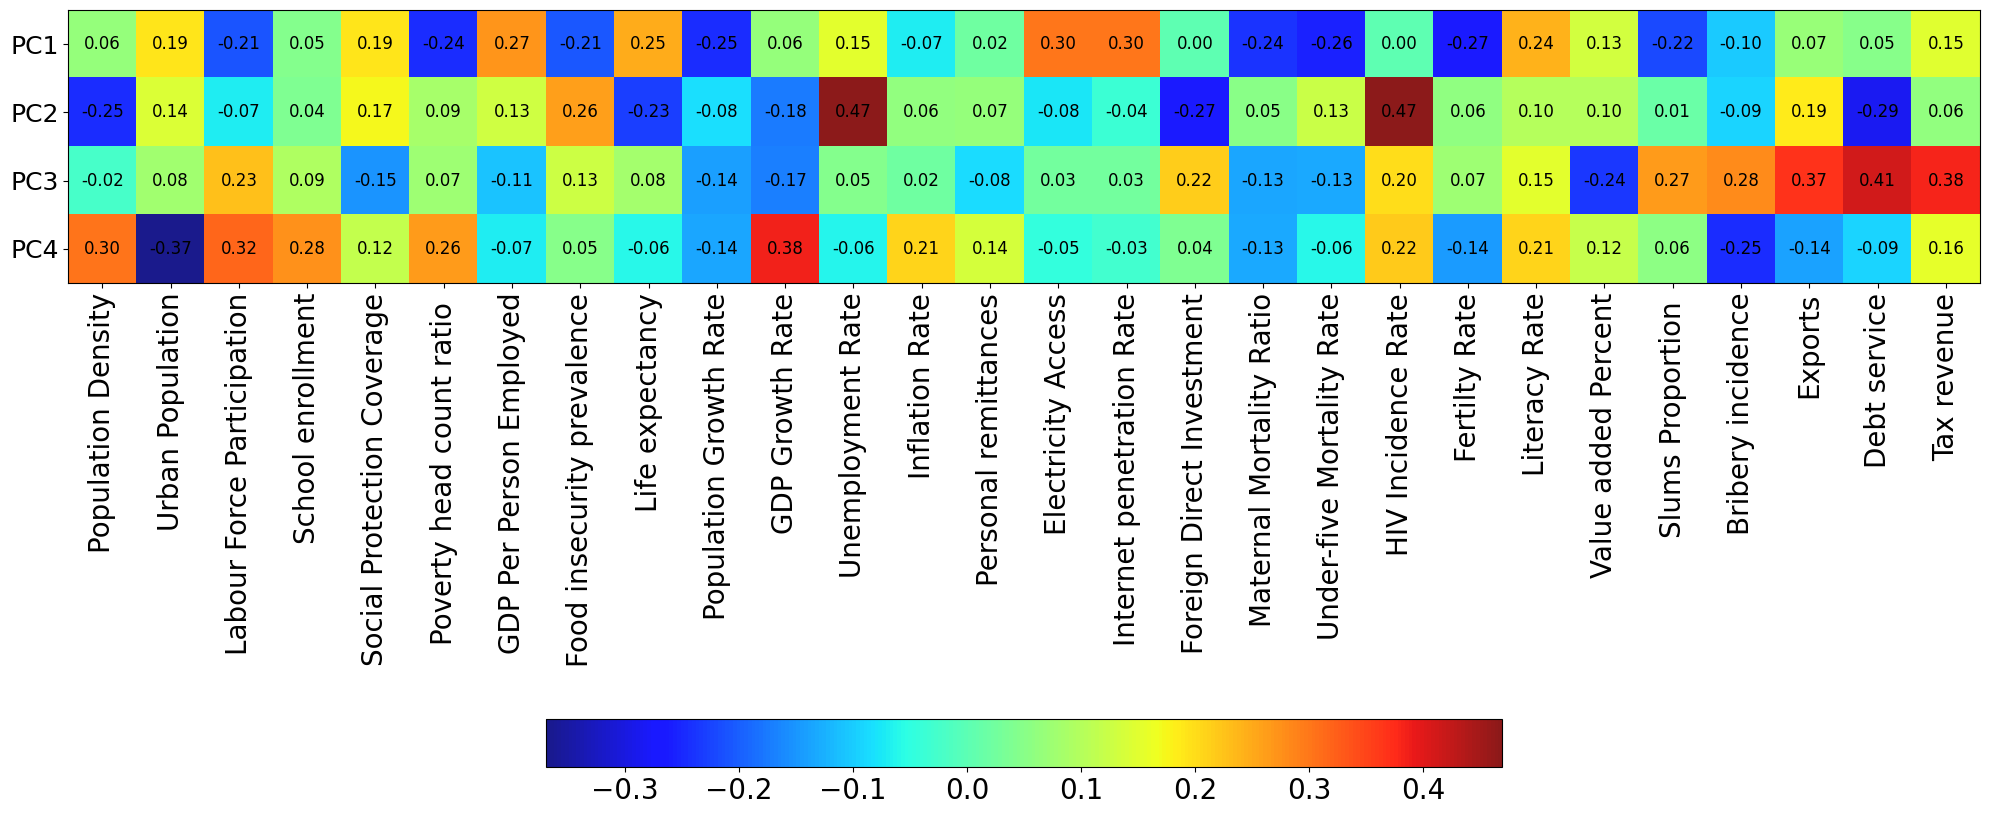

In [6]:
# This code generates figure 5, i.e., screen plot that plots eigenvalues or singular values and provide variance ratio of each PC.
ind.var_plot_ratio()

# Figure 6

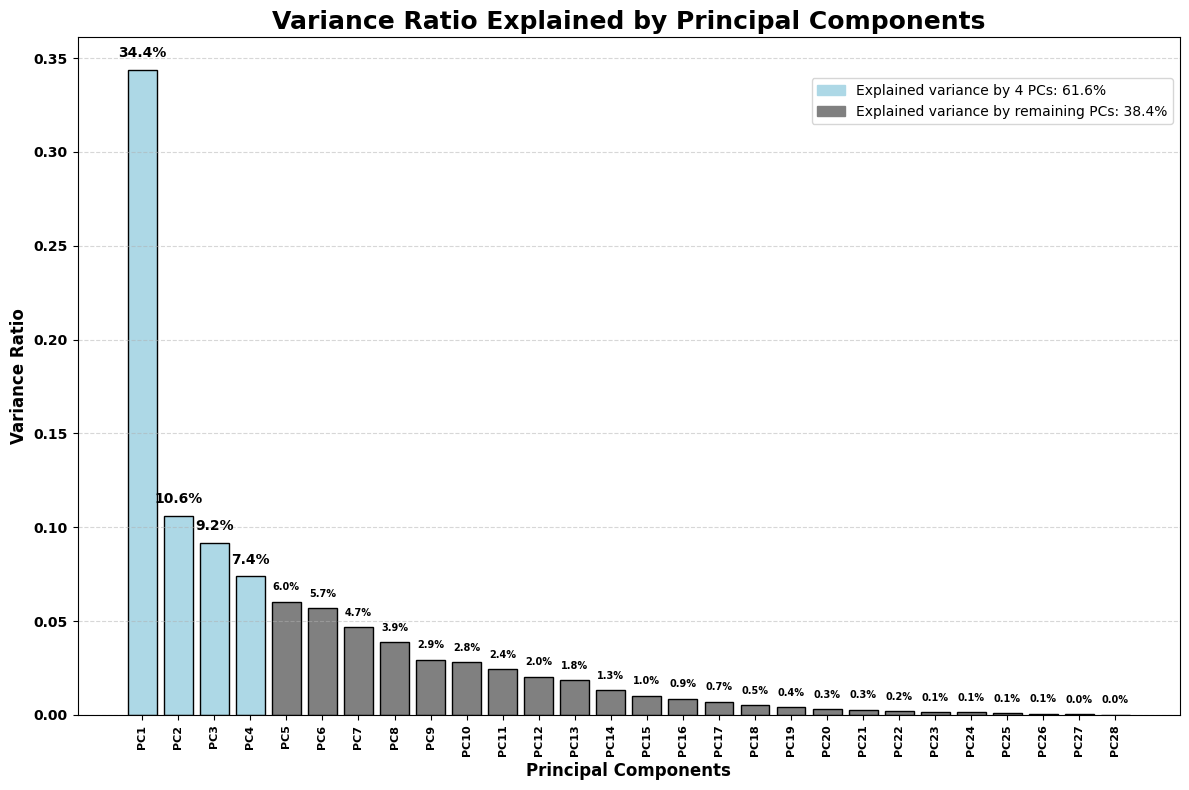

In [7]:
# This plot correspond to Figure 6 in the paper, that is, the factor loadings for the first four principal components
ind.corr_pcs()

# Figure 7

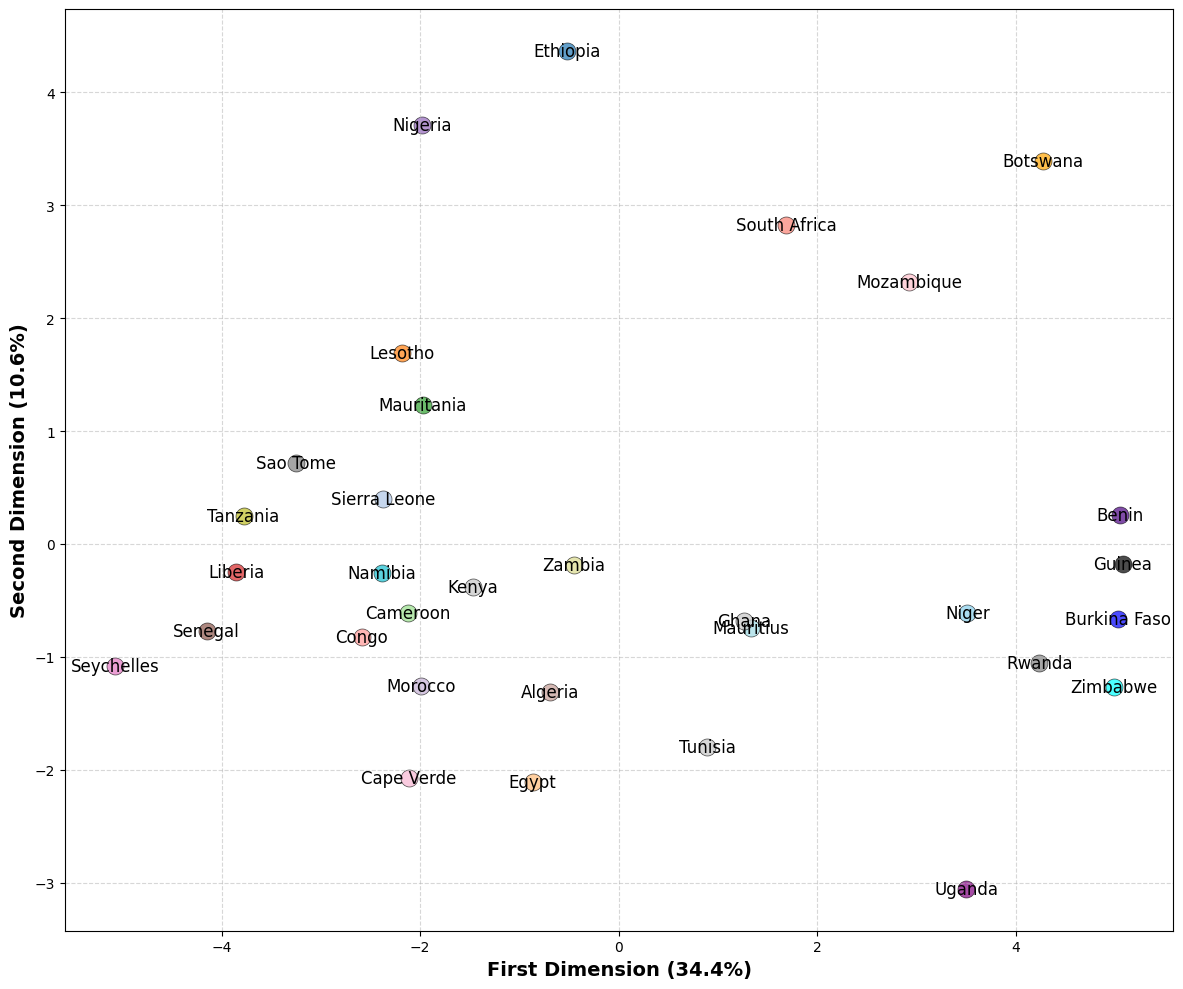

In [8]:
# This is the plot for Figure 7: projection of countries onto a 2D space based on their socioeconomic factors
ind.plot_countries()

In [9]:
threshold = 2.5
a_1 = Analysis(
    c_mtx_gen=c_mtx_gen, dim_red="2DPCA",
    img_prefix="dpca_", threshold=threshold)
a_1.apply_pca()
columns, dt, res = a_1.hierarchical.calculate_ordered_distance_matrix(threshold=2.5)

cluster 1: Index(['Benin', 'Burkina Faso', 'Congo', 'Guinea', 'Kenya', 'Liberia',
       'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Sao Tome', 'Senegal',
       'Tanzania'],
      dtype='object')
cluster 2: Index(['Cape Verde', 'Ethiopia', 'Sierra Leone', 'Uganda', 'Zambia',
       'Zimbabwe'],
      dtype='object')
cluster 3: Index(['Algeria', 'Botswana', 'Cameroon', 'Egypt', 'Ghana', 'Lesotho',
       'Mauritius', 'Morocco', 'Namibia', 'Rwanda', 'Seychelles',
       'South Africa', 'Tunisia'],
      dtype='object')


# Figure 8.

In [10]:
# This part of codes calculates the Euclidean pairwise distance matrices for all countries 
# based on the feature vectors of the contact matrices from (2𝐷)^2 𝑃𝐶𝐴 approach.
# No socioeconomic indicators are included in this part.
# Countries are then clustered based on the social contact patterns. 
a_1.hierarchical.plot_ordered_distance_matrix(columns=columns, dt=dt)

In [11]:
a_2 = Analysis(c_mtx_gen=c_mtx_gen, dim_red="2DPCA", img_prefix="dpca_", threshold=8)
a_2.contacts_apply_indicators()
columns, dt, res = a_2.hierarchical.calculate_ordered_distance_matrix(threshold=8)

cluster 1: Index(['Benin', 'Botswana', 'Burkina Faso', 'Guinea', 'Mozambique', 'Niger',
       'Rwanda', 'South Africa', 'Zimbabwe'],
      dtype='object')
cluster 2: Index(['Uganda'], dtype='object')
cluster 3: Index(['Ethiopia', 'Lesotho', 'Liberia', 'Mauritania', 'Nigeria'], dtype='object')
cluster 4: Index(['Algeria', 'Cape Verde', 'Cameroon', 'Congo', 'Egypt', 'Ghana', 'Kenya',
       'Mauritius', 'Morocco', 'Namibia', 'Sao Tome', 'Senegal', 'Seychelles',
       'Sierra Leone', 'Tunisia', 'Tanzania', 'Zambia'],
      dtype='object')


# Figure 9

In [12]:
# This line of code below generates Figure 6(b). 
# It executes Euclidean pairwise distance matrices calculated for all countries based on the 
# feature vector of social contacts and associated socioeconomic indicators.
# The pattern presents the elements in a nicer way.
a_2.hierarchical.plot_ordered_distance_matrix(columns=columns, dt=dt)

In [13]:
threshold = 2.5
a_1 = Analysis(
    c_mtx_gen=c_mtx_gen, dim_red="2DPCA",
    img_prefix="dpca_", threshold=threshold)
a_1.apply_pca()
columns, dt, res = a_1.hierarchical.calculate_ordered_distance_matrix(threshold=2.5)

cluster 1: Index(['Benin', 'Burkina Faso', 'Congo', 'Guinea', 'Kenya', 'Liberia',
       'Mauritania', 'Mozambique', 'Niger', 'Nigeria', 'Sao Tome', 'Senegal',
       'Tanzania'],
      dtype='object')
cluster 2: Index(['Cape Verde', 'Ethiopia', 'Sierra Leone', 'Uganda', 'Zambia',
       'Zimbabwe'],
      dtype='object')
cluster 3: Index(['Algeria', 'Botswana', 'Cameroon', 'Egypt', 'Ghana', 'Lesotho',
       'Mauritius', 'Morocco', 'Namibia', 'Rwanda', 'Seychelles',
       'South Africa', 'Tunisia'],
      dtype='object')


# Figure 10

/Users/user/PycharmProjects/African-social-contact-patterns/src/hierarchical.py:164: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


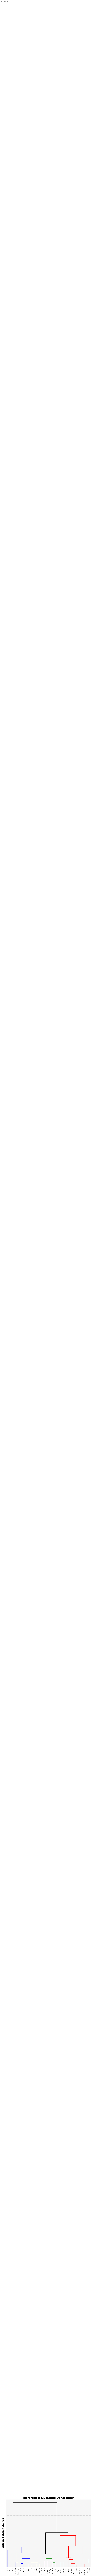

In [14]:
# The line of code executes the clustering in Figure 7. 
# Countries are clustered into 3 clusters based on the contact matrix. 
# We cut the hierarchy at a height of 2.5 to get the desired clusters.
a_1.hierarchical.plot_dendrogram_with_threshold(res=res, threshold=2.5)

In [15]:
a_2 = Analysis(c_mtx_gen=c_mtx_gen, dim_red="2DPCA", img_prefix="dpca_", threshold=8)
_, _, res = a_2.hierarchical.calculate_ordered_distance_matrix(threshold=8)

cluster 1: Index(['Benin', 'Botswana', 'Burkina Faso', 'Guinea', 'Mozambique', 'Niger',
       'Rwanda', 'South Africa', 'Zimbabwe'],
      dtype='object')
cluster 2: Index(['Uganda'], dtype='object')
cluster 3: Index(['Ethiopia', 'Lesotho', 'Liberia', 'Mauritania', 'Nigeria'], dtype='object')
cluster 4: Index(['Algeria', 'Cape Verde', 'Cameroon', 'Congo', 'Egypt', 'Ghana', 'Kenya',
       'Mauritius', 'Morocco', 'Namibia', 'Sao Tome', 'Senegal', 'Seychelles',
       'Sierra Leone', 'Tunisia', 'Tanzania', 'Zambia'],
      dtype='object')


# Figure 11.

/Users/user/PycharmProjects/African-social-contact-patterns/src/hierarchical.py:164: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


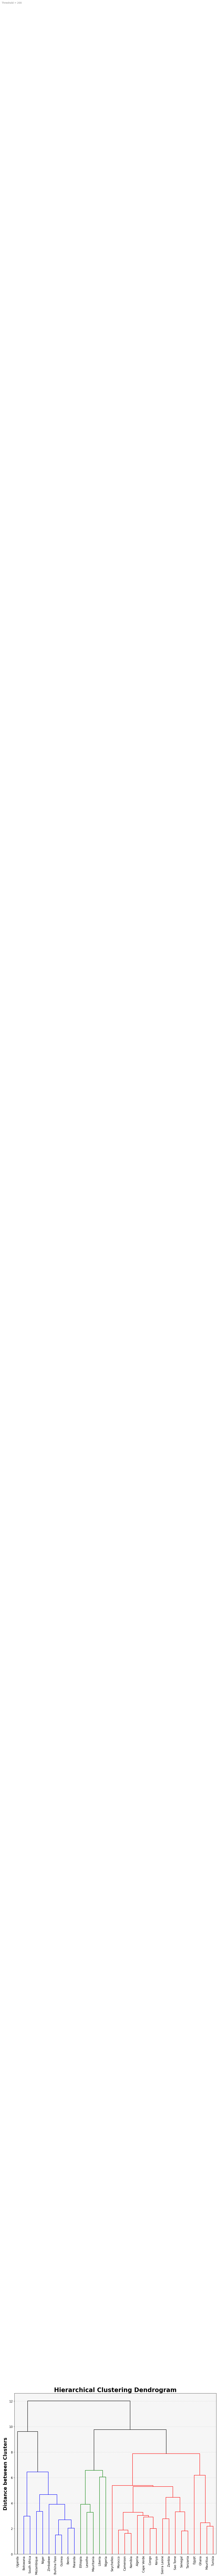

In [16]:
# The line of code below produces hierarchical clustering in Figure 8. 
# Countries are clustered into 4 clusters based on the contact matrix and associated socioeconomic indicators
# we cut the hierarchy at a height of 8 to get the desired clusters.
a_2.hierarchical.plot_dendrogram_with_threshold(res=res, threshold=8)

# Figure 12.

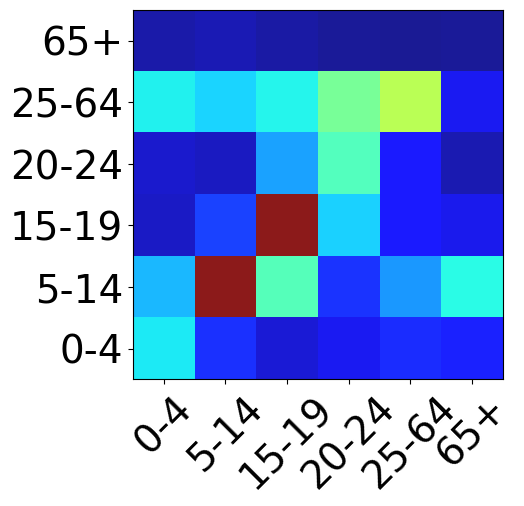

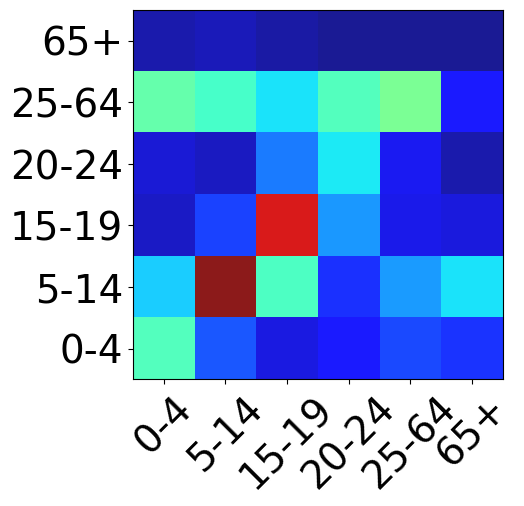

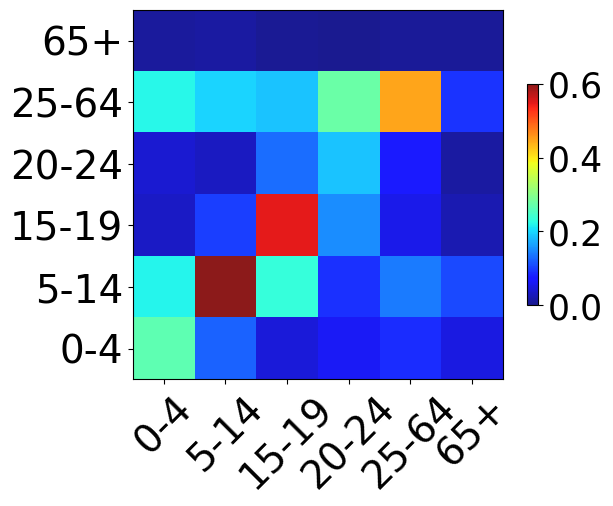

In [17]:
# The following line of code generate figures of standardized contact matrices that correspond to 
# Zimbabwe, Mauritania, and Sierra Leone, respectively. The three countries are selected from the three 
# clusters using the contact matrices in Fig. 8. These countries are in the middle of the clusters.
def country_contacts(contacts):
    for country in ["Zimbabwe", "Mauritania", "Sierra Leone"]:
        age_group = ["0-4", "5-14", "15-19", "20-24", "25-64", "65+"]
        matrix_to_plot = contacts.setting_contacts[country]["contact_full"].T * contacts.setting_contacts[country]["beta"]
        img = plt.imshow(matrix_to_plot.T,
                         cmap='jet', vmin=0, vmax=0.6,
                         alpha=.9, interpolation="nearest")
        ticks = np.arange(0, 6)
        plt.yticks(ticks=ticks, labels=age_group, rotation=0, fontsize=28)
        plt.xticks(ticks=ticks, labels=age_group, rotation=45, fontsize=28)
        plt.gca().invert_yaxis()
        if country == "Sierra Leone":
            cbar = plt.colorbar(img, shrink=0.6)
            tick_font_size = 25
            cbar.ax.tick_params(labelsize=tick_font_size)
        plt.show()
country_contacts(contacts=c_mtx_gen)

# Figure 13.

/Users/user/PycharmProjects/African-social-contact-patterns/src/indicators.py:149: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


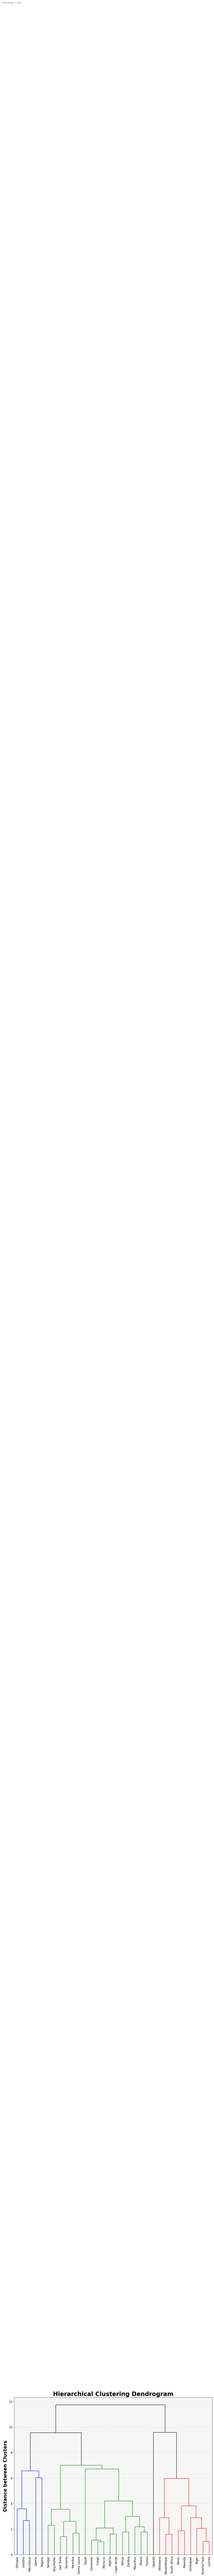

In [18]:
# The code below generates a dendrogram in Figure 10 (see appendix).
# It groups the countries into 4 clusters based on socioeconomic indicators only. 
# Social mixing contacts is not factored in.
ind.dendrogram_pca()